This mini project aims to utilize the power of machine learning and boosting to create a model that will predict and provide guidelines for employees when picking mushrooms. Using the feature, the model will indicate if a particular mushroom is good or bad.

# Library and data import

Import required libraries

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Data import

In [8]:
filePath = 'data/mushrooms.csv'
data = pd.read_csv(filePath)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Exploration Analysis

In [9]:
# Get the shape of the data
data.shape

(8124, 23)

In [10]:
# Describe the data
data.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [11]:
# Reset index
data.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


<AxesSubplot:xlabel='class', ylabel='count'>

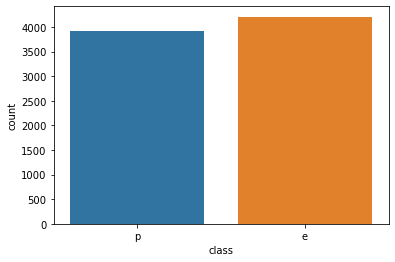

In [12]:
sns.countplot(data=data, x='class')

In [13]:
# Check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

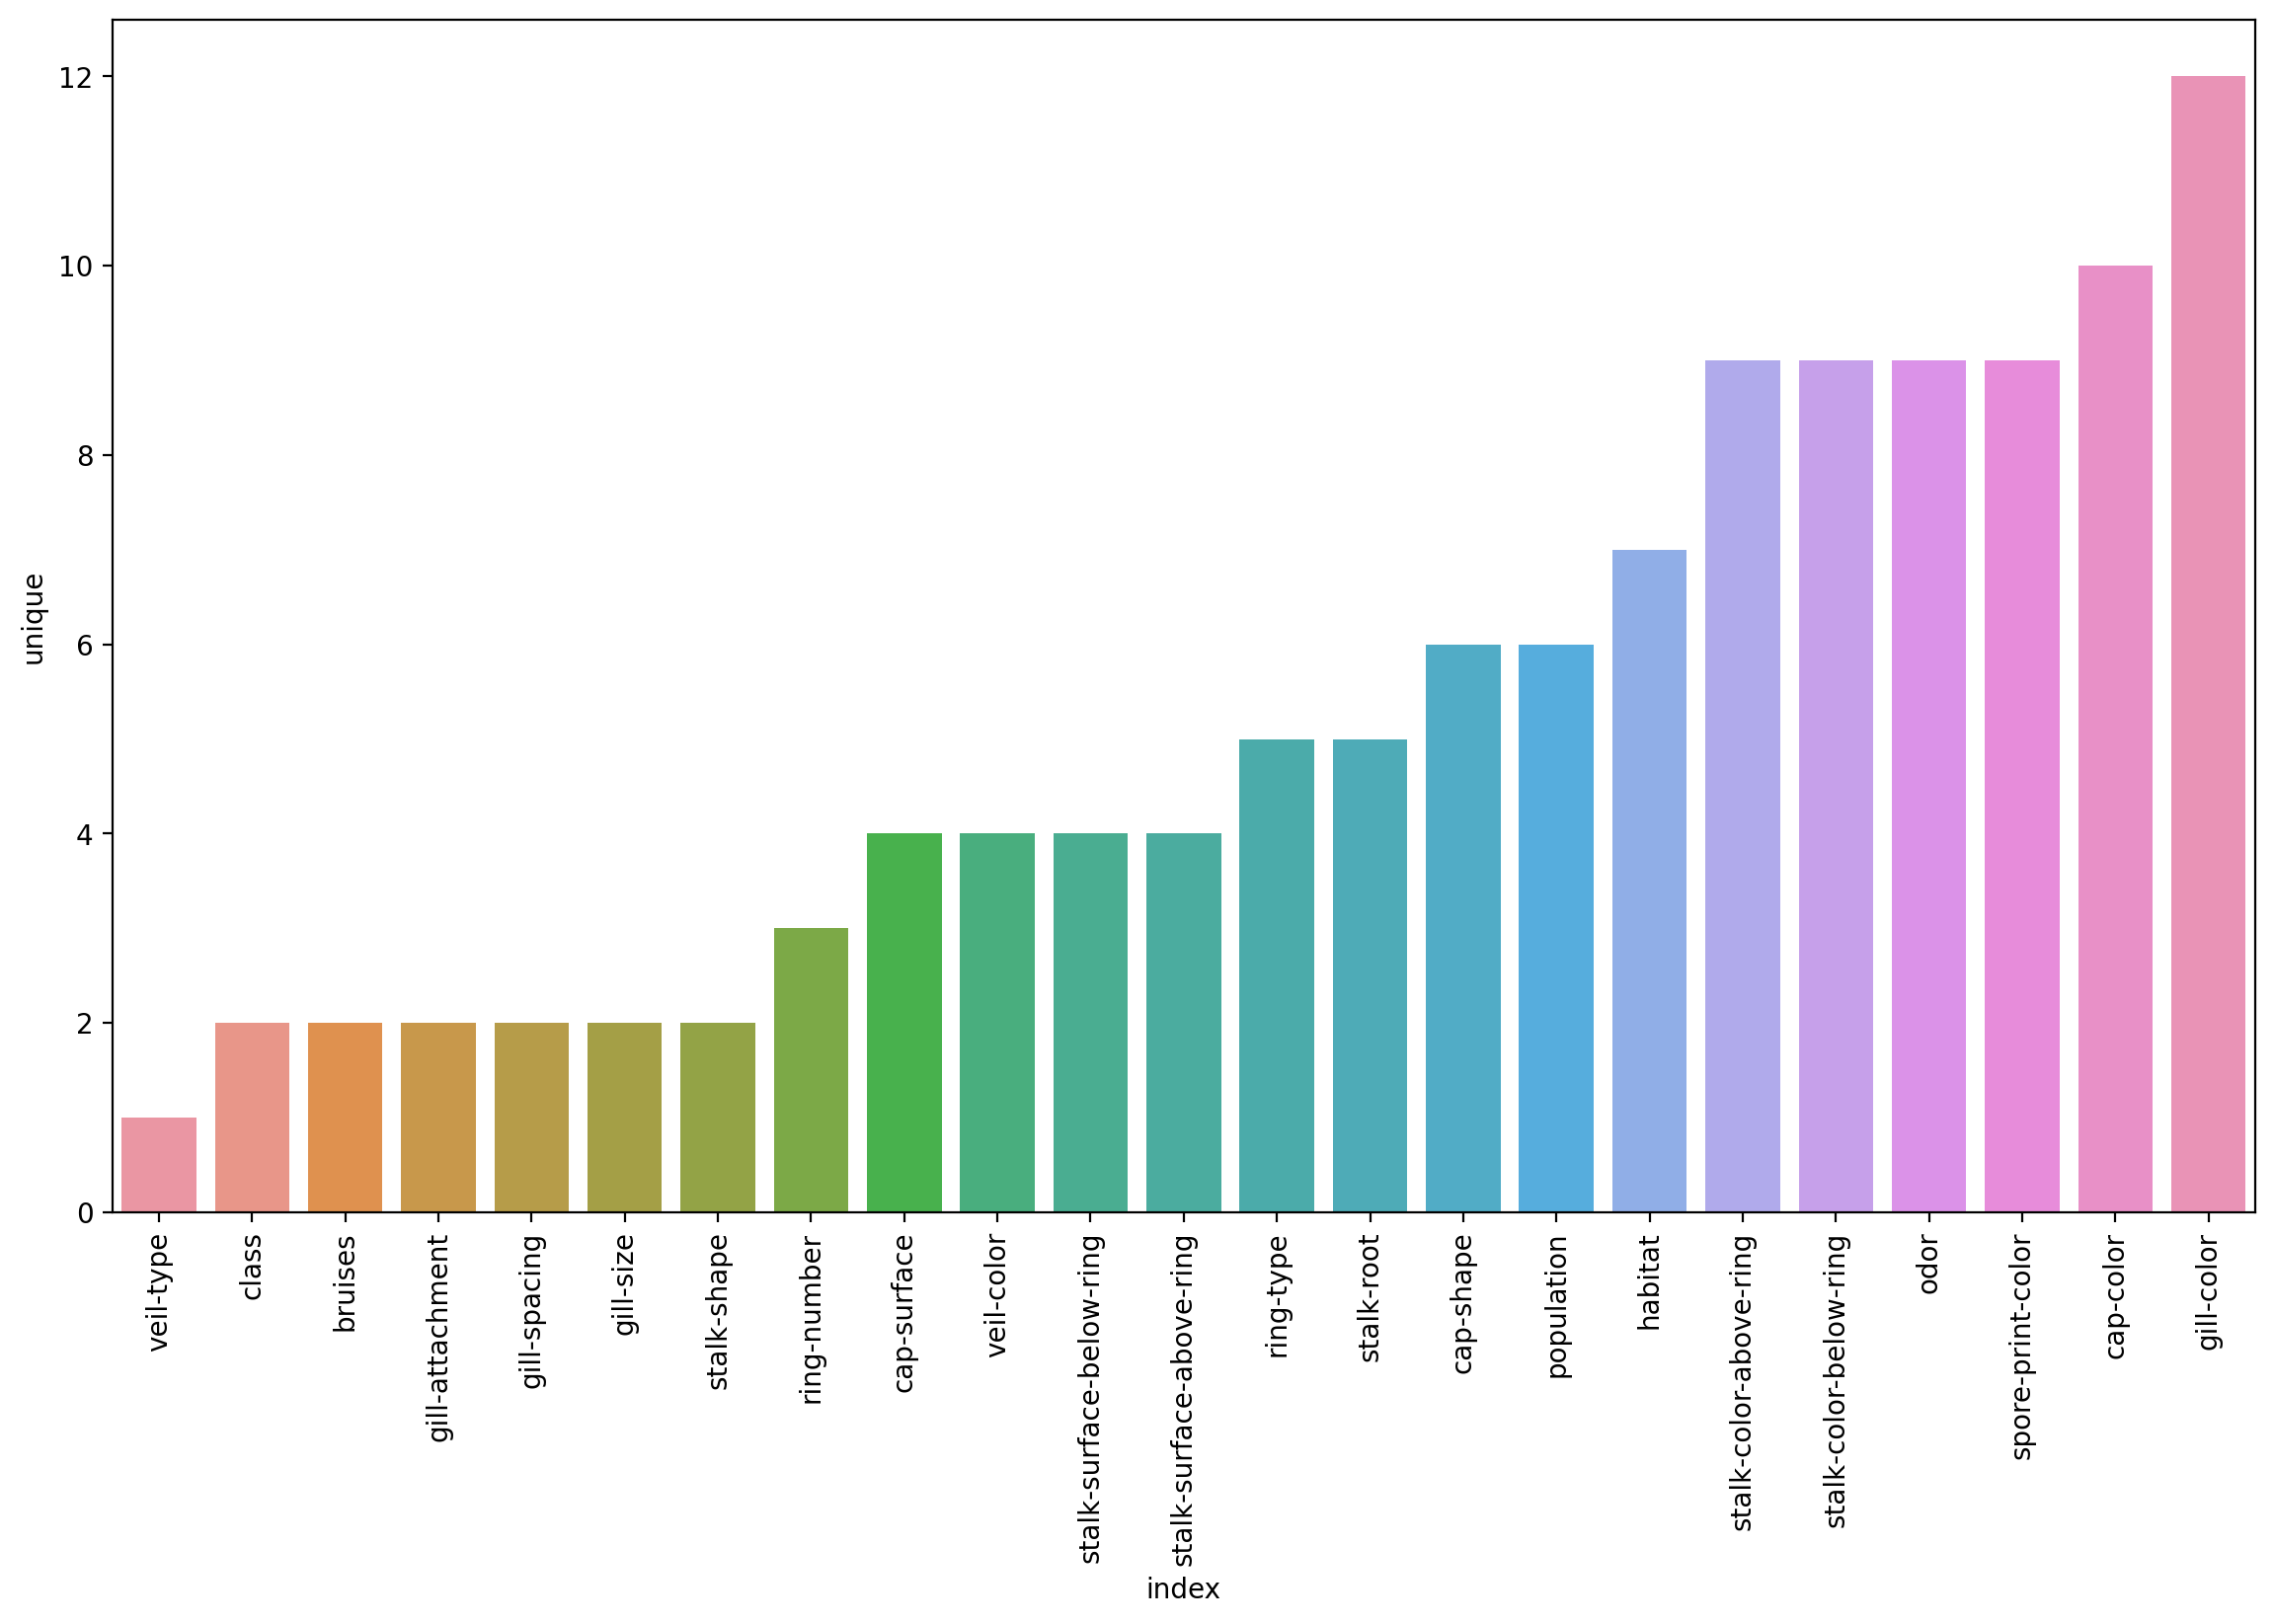

In [14]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(data=data.describe().transpose().reset_index().sort_values('unique'),x='index', y='unique')
plt.xticks(rotation=90);

# Train Test Split

In [15]:
X = data.drop(['class'], axis=1)
y = data['class']

In [16]:
X = pd.get_dummies(data=X, drop_first=True)

In [17]:
# X

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Model Creation

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
model = AdaBoostClassifier(n_estimators=1)

In [29]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

# Model Evaluation

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
prediction = model.predict(X_test)

In [32]:
prediction

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [37]:
accuracy_score(y_test,prediction)

0.8777686628383922

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [34]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
model.feature_importances_.argmax()

22

In [36]:
X.columns[22]

'odor_n'

# Analyzing the performance

In [39]:
# Creating an elbow method
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    err = 1-accuracy_score(y_test,pred)
    
    error_rates.append(err)
    
    

In [40]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.04, 0.04, 0.  , 0.  ,
       0.04, 0.02, 0.  , 0.  , 0.  , 0.12, 0.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.18, 0.  , 0.08, 0.  , 0.  , 0.06,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02])

In [44]:
features = pd.DataFrame(data=model.feature_importances_, index=X.columns,columns=['Importance'])

In [45]:
features

,Importance
cap-shape_c,0.00
cap-shape_f,0.00
cap-shape_k,0.00
cap-shape_s,0.00
cap-shape_x,0.00
...,...
habitat_l,0.00
habitat_m,0.00
habitat_p,0.00
habitat_u,0.00


In [46]:
imp_features = features[features['Importance']>0]

In [47]:
imp_features

,Importance
cap-color_c,0.02
cap-color_n,0.02
cap-color_w,0.02
bruises_t,0.04
odor_c,0.04
odor_f,0.04
odor_n,0.04
odor_p,0.02
gill-spacing_w,0.12
gill-size_n,0.08


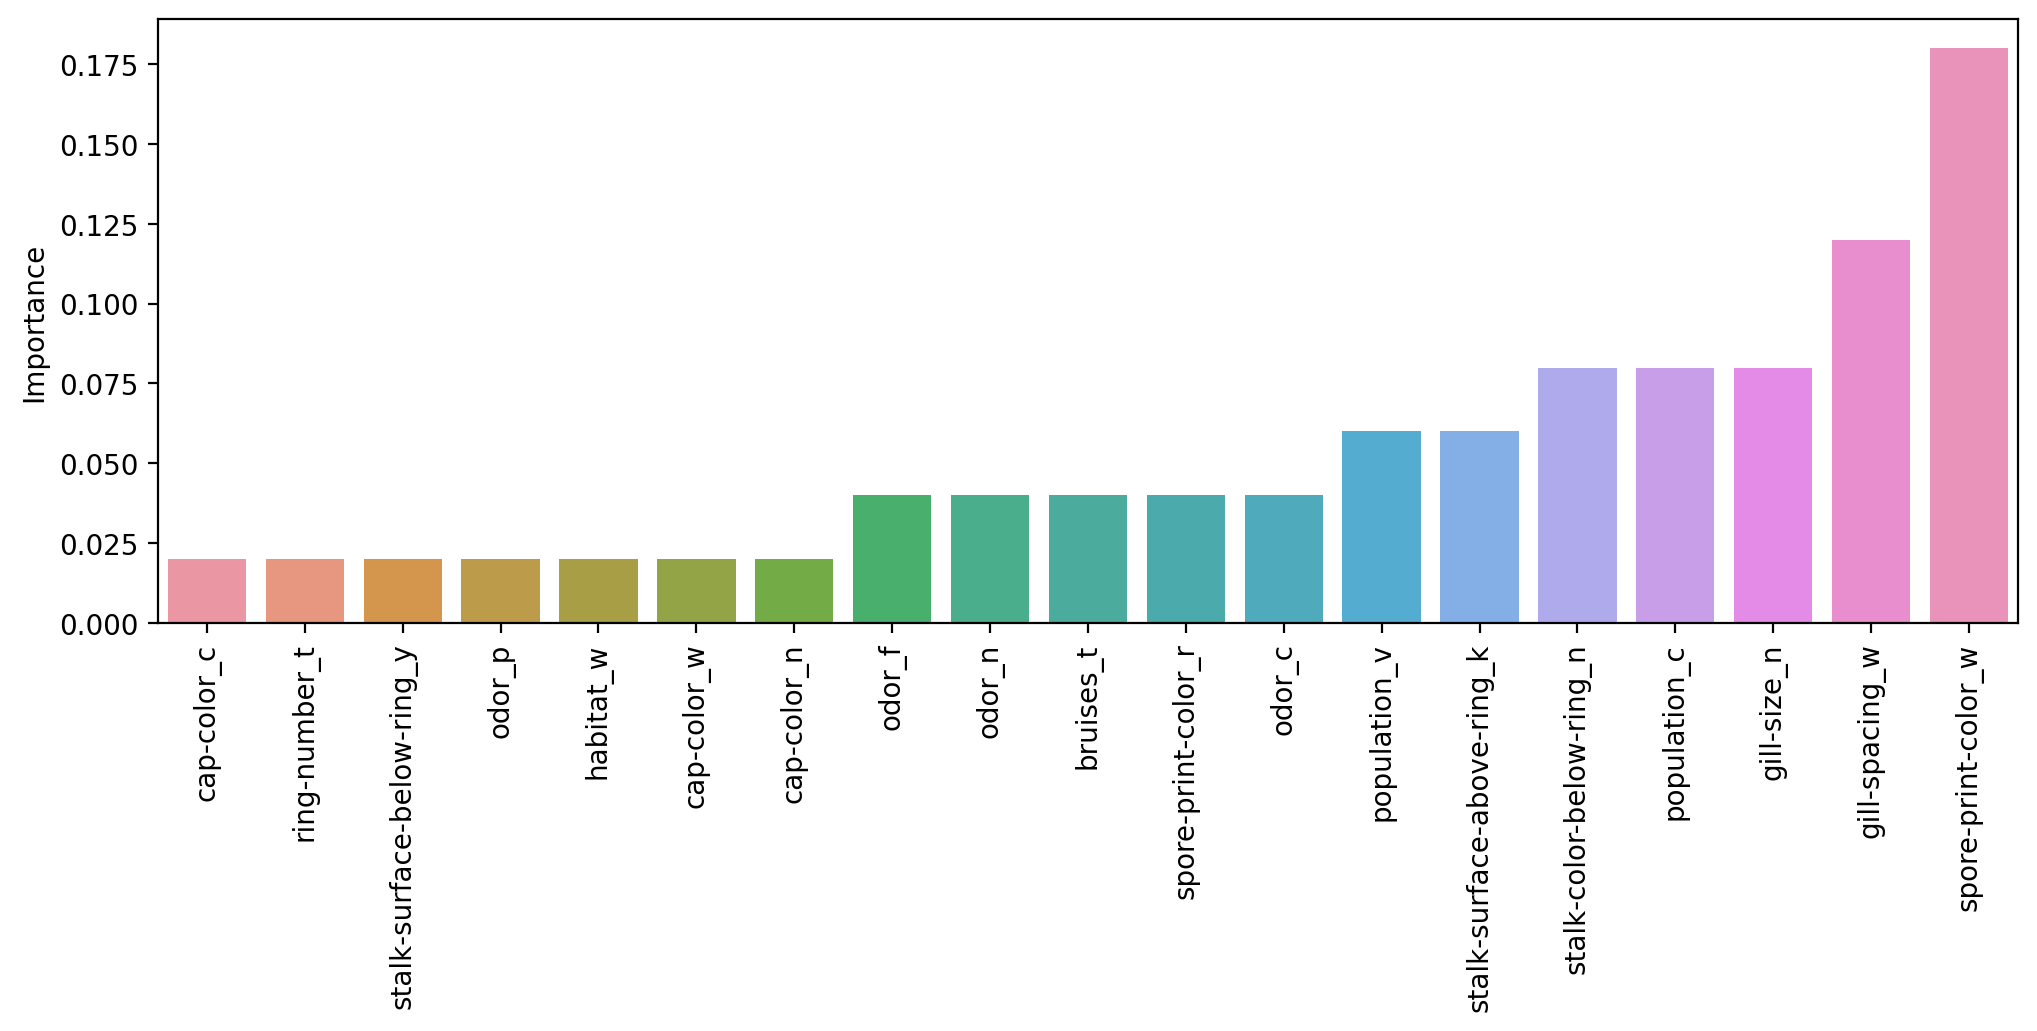

In [56]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(data=imp_features.sort_values('Importance'), x=imp_features.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);